In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [61]:
data = pd.read_csv('diabetes.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


***Data Preprocessing***

In [63]:
dtypes = data.dtypes
unique = data.nunique()
pd.DataFrame({'dtypes': dtypes , 'unique': unique}).T

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
dtypes,object,float64,int64,int64,object,float64,float64,int64,int64
unique,3,102,2,2,6,4247,18,18,2


In [64]:
cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
data[cols] = data[cols].astype('category')

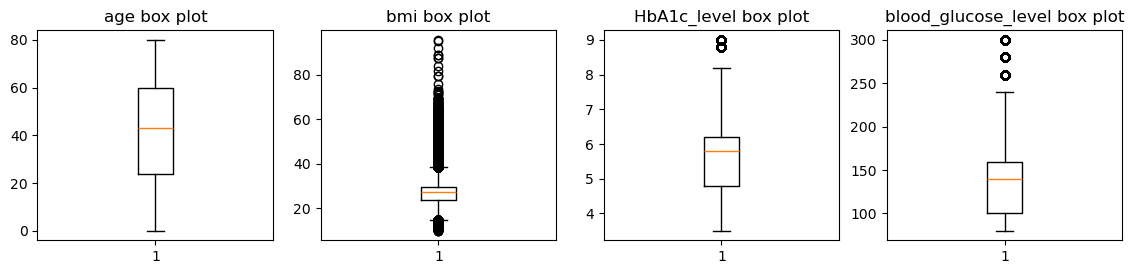

In [65]:
numCols = data.select_dtypes('number').columns
plt.figure(figsize=(14,6))
for i, col in enumerate(numCols):
    plt.subplot(2, 4, i+1)
    plt.boxplot(data[col])
    plt.title(f'{col} box plot')

In [66]:
for col in numCols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Lf = Q1 - 1.5*IQR
    Up = Q3 + 1.5*IQR
    Outliers = data.loc[((data['bmi'] > Up) | (data['bmi'] < Lf))]
    data[col] = np.where(data[col] > Up, Up, data[col])
    data[col] = np.where(data[col] < Lf, Lf, data[col])


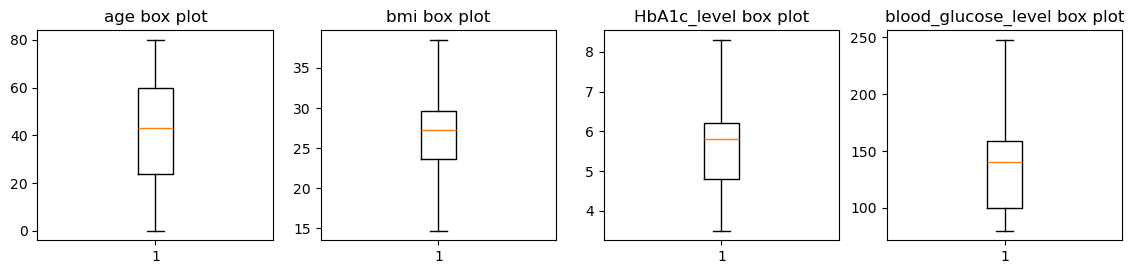

In [67]:
plt.figure(figsize=(14,6))
for i, col in enumerate(numCols):
    plt.subplot(2, 4, i+1)
    plt.boxplot(data[col])
    plt.title(f'{col} box plot')

In [68]:
data.duplicated().sum()

4091

In [69]:
data.drop_duplicates(inplace = True)

In [70]:
columns = data.select_dtypes('category').columns
for col in columns:
    data[col] = data[col].cat.codes

In [71]:
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***Logistic Regression Model***

In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test , y_pred)
print(f'Accuracy is: {accuracy}')

Accuracy is: 0.9595801619573906
